In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob
import os

In [2]:
asteroid_files = "asteroids_10_years_2015_2025.csv"
df = pd.read_csv(asteroid_files)
df.head()

,id,neo_reference_id,name,cleaned_name,nasa_jpl_url,is_hazardous,approach_date,absolute_magnitude,diameter_min_kilometers,diameter_max_kilometers,...,diameter_avg_feet,full_approach_date,approach_epoch,relative_velocity_kms,relative_velocity_kmh,relative_velocity_mph,miss_distance_km,miss_distance_lunar,miss_distance_astronomical,orbiting_body
0,3449591,3449591,(2009 EP2),2009 EP2,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,True,2015-10-11,21.61,0.126635,0.283165,...,672.245135,2015-Oct-11 22:20,1444602000000,19.918377,71706.156946,44555.417353,4.606436e+07,119.781358,0.307921,Earth
1,3467313,3467313,(2009 SB15),2009 SB15,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,20.60,0.201630,0.450858,...,1070.354571,2015-Oct-11 19:33,1444591980000,32.727252,117818.107081,73207.589925,7.141485e+07,185.700336,0.477379,Earth
2,3718432,3718432,(2015 HL171),2015 HL171,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.20,0.038420,0.085909,...,203.951859,2015-Oct-11 09:24,1444555440000,14.275884,51393.180931,31933.724007,5.830715e+07,151.616349,0.389759,Earth
3,3729280,3729280,(2015 TB25),2015 TB25,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.41,0.034878,0.077990,...,185.151685,2015-Oct-11 17:54,1444586040000,9.540229,34344.824298,21340.538186,3.654891e+06,9.503829,0.024431,Earth
4,3729845,3729845,(2015 TG145),2015 TG145,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.40,0.035039,0.078350,...,186.006306,2015-Oct-11 02:05,1444529100000,14.841230,53428.427126,33198.346844,1.414946e+07,36.792914,0.094583,Earth


In [3]:
variables = [
 'neo_reference_id',
 'cleaned_name',
 'nasa_jpl_url',
 'is_hazardous',
 'approach_date',
 'absolute_magnitude',
 'diameter_avg_kilometers',
 'full_approach_date',
 'approach_epoch',
 'relative_velocity_kmh',
 'miss_distance_km',
 'orbiting_body']
# drop columns with duplicated data
df = df[variables]
df.head()

,neo_reference_id,cleaned_name,nasa_jpl_url,is_hazardous,approach_date,absolute_magnitude,diameter_avg_kilometers,full_approach_date,approach_epoch,relative_velocity_kmh,miss_distance_km,orbiting_body
0,3449591,2009 EP2,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,True,2015-10-11,21.61,0.204900,2015-Oct-11 22:20,1444602000000,71706.156946,4.606436e+07,Earth
1,3467313,2009 SB15,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,20.60,0.326244,2015-Oct-11 19:33,1444591980000,117818.107081,7.141485e+07,Earth
2,3718432,2015 HL171,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.20,0.062165,2015-Oct-11 09:24,1444555440000,51393.180931,5.830715e+07,Earth
3,3729280,2015 TB25,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.41,0.056434,2015-Oct-11 17:54,1444586040000,34344.824298,3.654891e+06,Earth
4,3729845,2015 TG145,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,False,2015-10-11,24.40,0.056695,2015-Oct-11 02:05,1444529100000,53428.427126,1.414946e+07,Earth


In [4]:
df.shape

(73832, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73832 entries, 0 to 73831
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   neo_reference_id         73832 non-null  int64  
 1   cleaned_name             73832 non-null  object 
 2   nasa_jpl_url             73832 non-null  object 
 3   is_hazardous             73832 non-null  bool   
 4   approach_date            73832 non-null  object 
 5   absolute_magnitude       73832 non-null  float64
 6   diameter_avg_kilometers  73832 non-null  float64
 7   full_approach_date       73832 non-null  object 
 8   approach_epoch           73832 non-null  int64  
 9   relative_velocity_kmh    73832 non-null  float64
 10  miss_distance_km         73832 non-null  float64
 11  orbiting_body            73832 non-null  object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 6.3+ MB


In [6]:
df.duplicated().sum()

9159

In [7]:
df.isnull().sum()

neo_reference_id           0
cleaned_name               0
nasa_jpl_url               0
is_hazardous               0
approach_date              0
absolute_magnitude         0
diameter_avg_kilometers    0
full_approach_date         0
approach_epoch             0
relative_velocity_kmh      0
miss_distance_km           0
orbiting_body              0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64673 entries, 0 to 73831
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   neo_reference_id         64673 non-null  int64  
 1   cleaned_name             64673 non-null  object 
 2   nasa_jpl_url             64673 non-null  object 
 3   is_hazardous             64673 non-null  bool   
 4   approach_date            64673 non-null  object 
 5   absolute_magnitude       64673 non-null  float64
 6   diameter_avg_kilometers  64673 non-null  float64
 7   full_approach_date       64673 non-null  object 
 8   approach_epoch           64673 non-null  int64  
 9   relative_velocity_kmh    64673 non-null  float64
 10  miss_distance_km         64673 non-null  float64
 11  orbiting_body            64673 non-null  object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 6.0+ MB


In [10]:
df.select_dtypes(include='number').describe()

,neo_reference_id,absolute_magnitude,diameter_avg_kilometers,approach_epoch,relative_velocity_kmh,miss_distance_km
count,6.467300e+04,64673.000000,64673.000000,6.467300e+04,64673.000000,6.467300e+04
mean,2.954295e+07,24.432492,0.119616,1.607680e+12,44881.062362,3.128060e+07
std,2.535933e+07,2.591002,0.259672,8.833958e+10,23764.895677,2.290835e+07
min,2.000433e+06,10.390000,0.001105,1.444263e+12,203.346433,6.745533e+03
25%,3.759285e+06,22.700000,0.024074,1.534657e+12,26983.687332,9.804925e+06
50%,5.401666e+07,24.630000,0.050997,1.611057e+12,40647.913016,2.799625e+07
75%,5.431719e+07,26.260000,0.124035,1.682483e+12,58729.625202,5.102473e+07
max,5.455110e+07,32.950000,35.937066,1.759708e+12,236990.128088,7.479468e+07


In [11]:
df.to_csv('asteroids_10_years.csv', index=False)

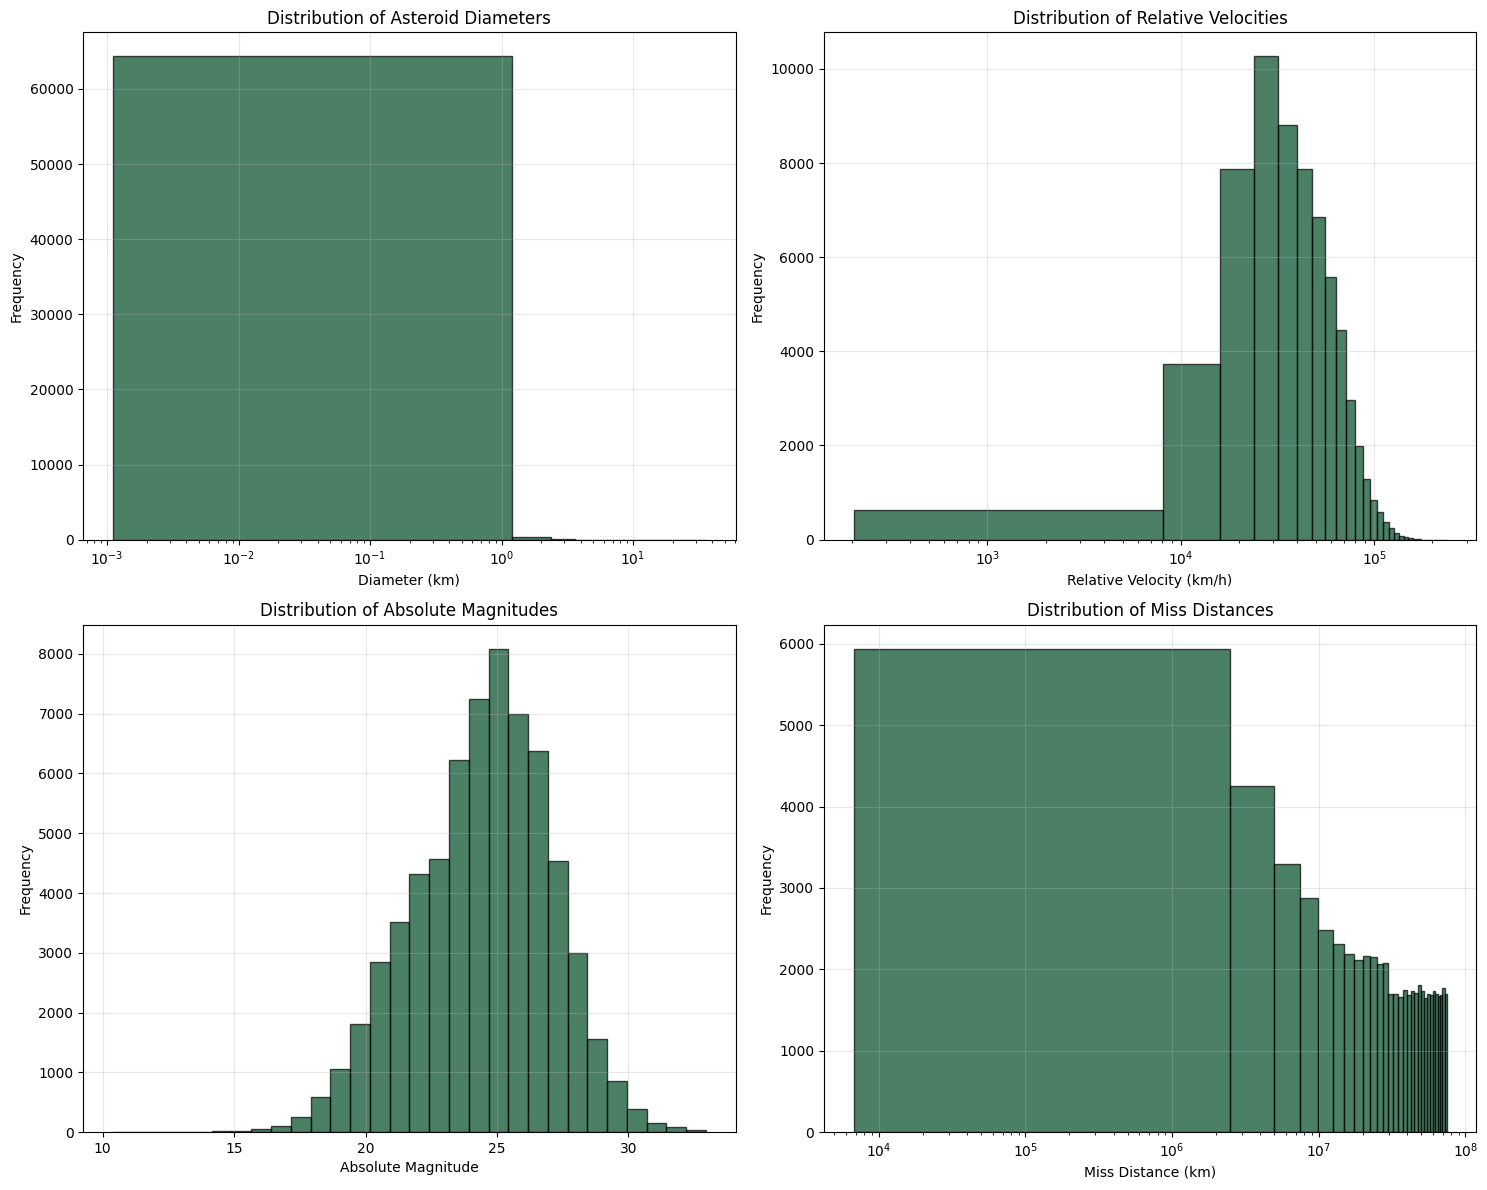

In [12]:
plt.style.use('default')
sns.set_palette("ocean")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].hist(df['diameter_avg_kilometers'], bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Diameter (km)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Asteroid Diameters')
axes[0,0].set_xscale('log')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df['relative_velocity_kmh'], bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Relative Velocity (km/h)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Relative Velocities')
axes[0,1].set_xscale('log')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df['absolute_magnitude'], bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Absolute Magnitude')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Absolute Magnitudes')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['miss_distance_km'], bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Miss Distance (km)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Miss Distances')
axes[1,1].set_xscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

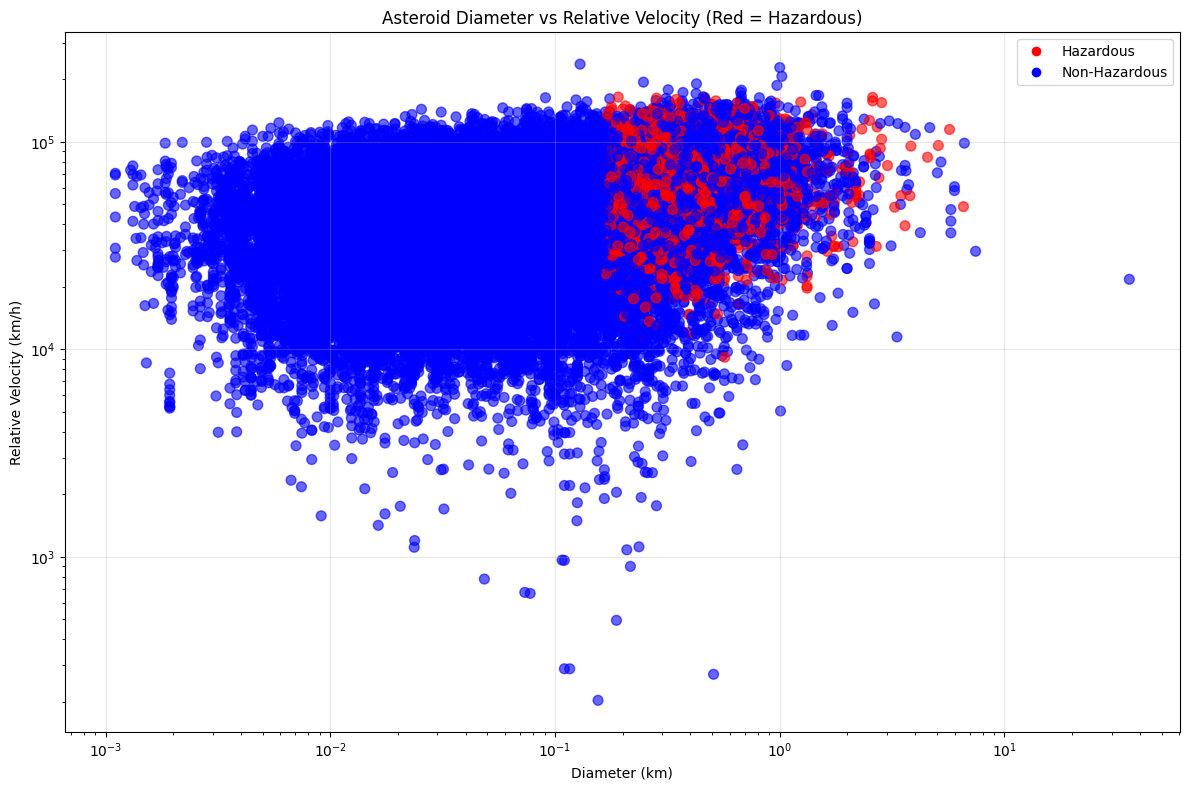

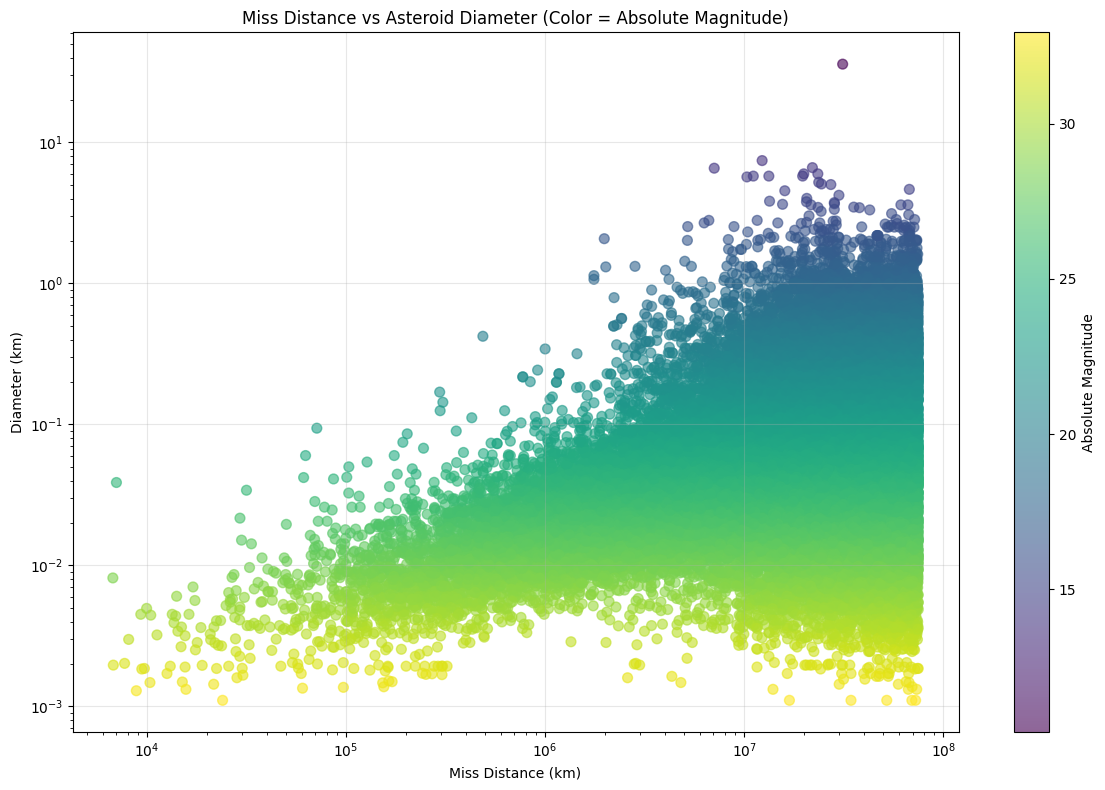

In [13]:
# Scatter plot: Diameter vs Relative Velocity, colored by hazardous status
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['diameter_avg_kilometers'], df['relative_velocity_kmh'], 
                     c=df['is_hazardous'].map({True: 'red', False: 'blue'}),
                     alpha=0.6, s=50)
plt.xlabel('Diameter (km)')
plt.ylabel('Relative Velocity (km/h)')
plt.title('Asteroid Diameter vs Relative Velocity (Red = Hazardous)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Hazardous'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Non-Hazardous')]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

# Scatter plot: Miss Distance vs Diameter
plt.figure(figsize=(12, 8))
plt.scatter(df['miss_distance_km'], df['diameter_avg_kilometers'], 
           alpha=0.6, s=50, c=df['absolute_magnitude'], cmap='viridis')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Diameter (km)')
plt.title('Miss Distance vs Asteroid Diameter (Color = Absolute Magnitude)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Absolute Magnitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


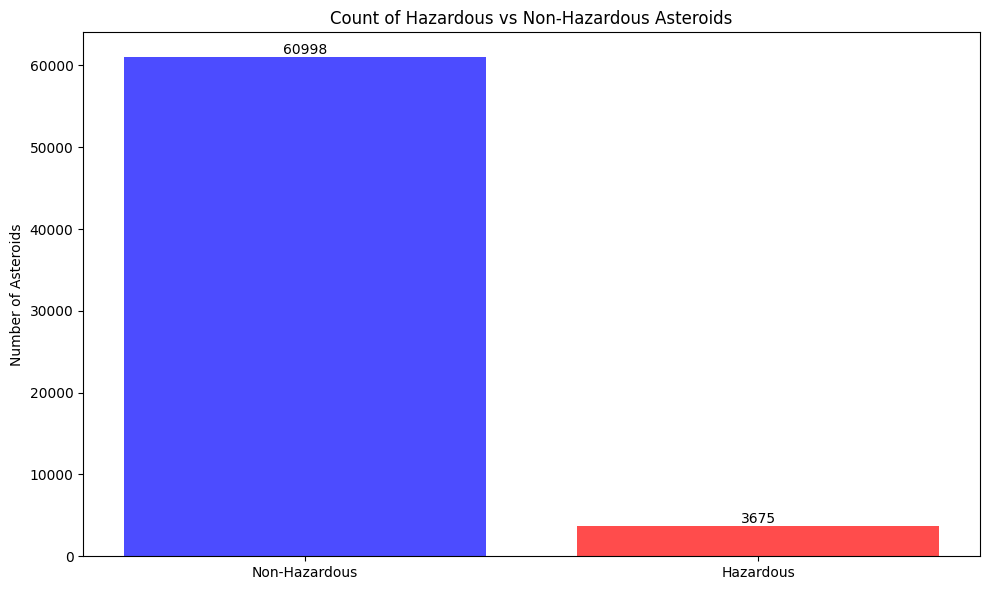

In [14]:
# Count of hazardous vs non-hazardous asteroids
plt.figure(figsize=(10, 6))
hazardous_counts = df['is_hazardous'].value_counts()
plt.bar(['Non-Hazardous', 'Hazardous'], hazardous_counts.values, 
        color=['blue', 'red'], alpha=0.7)
plt.ylabel('Number of Asteroids')
plt.title('Count of Hazardous vs Non-Hazardous Asteroids')
for i, v in enumerate(hazardous_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

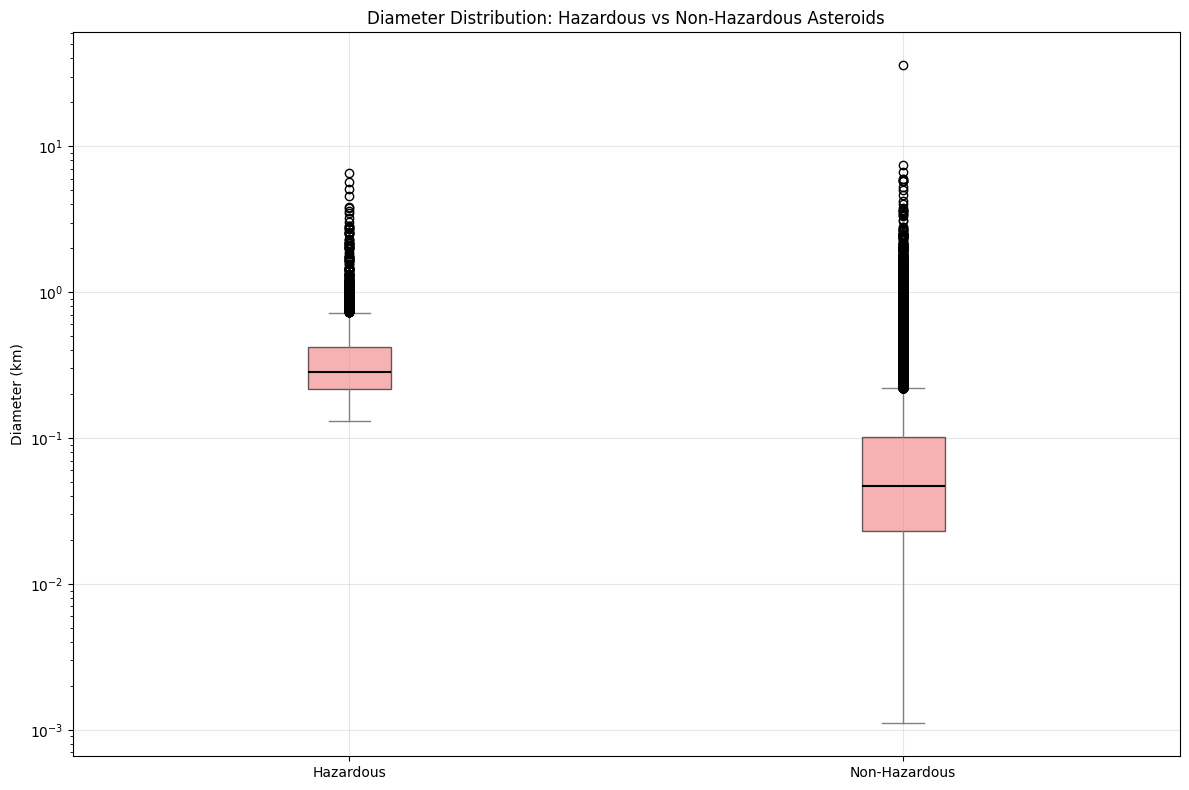

In [15]:
plt.figure(figsize=(12, 8))

boxplot_data = [
    df[df['is_hazardous'] == True]['diameter_avg_kilometers'],
    df[df['is_hazardous'] == False]['diameter_avg_kilometers']
]

plt.boxplot(
    boxplot_data,
    tick_labels=['Hazardous', 'Non-Hazardous'],  
    patch_artist=True,                          
    boxprops=dict(facecolor='lightcoral', alpha=0.6),
    medianprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
)

plt.yscale('log')
plt.ylabel('Diameter (km)')
plt.title('Diameter Distribution: Hazardous vs Non-Hazardous Asteroids')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

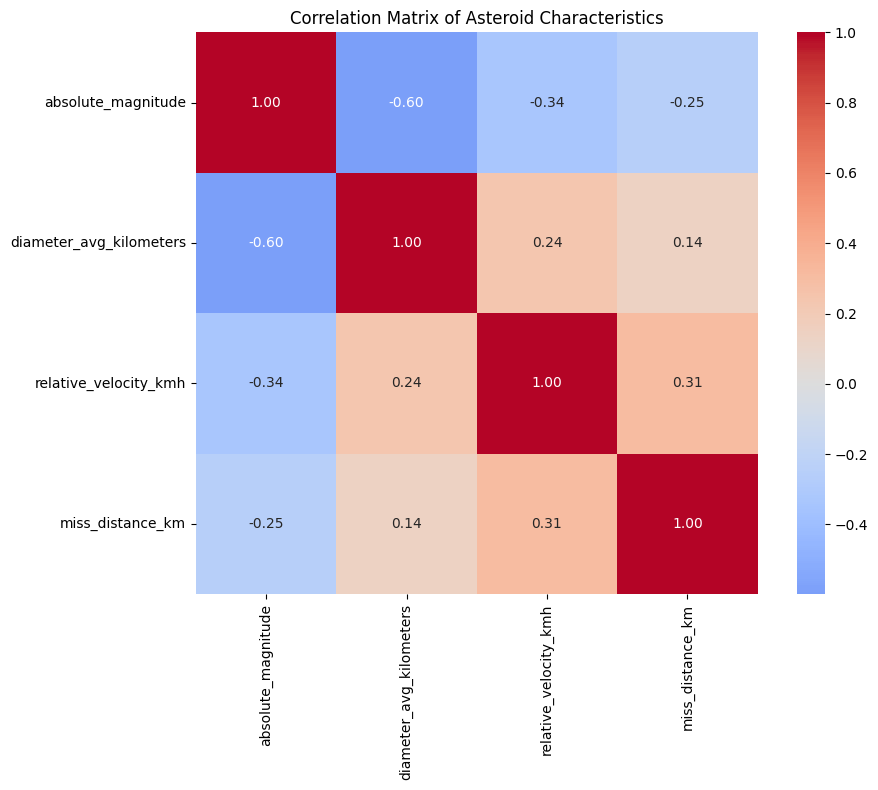

In [17]:
numerical_cols = ['absolute_magnitude', 'diameter_avg_kilometers', 'relative_velocity_kmh', 
                  'miss_distance_km']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Asteroid Characteristics')
plt.tight_layout()
plt.show()

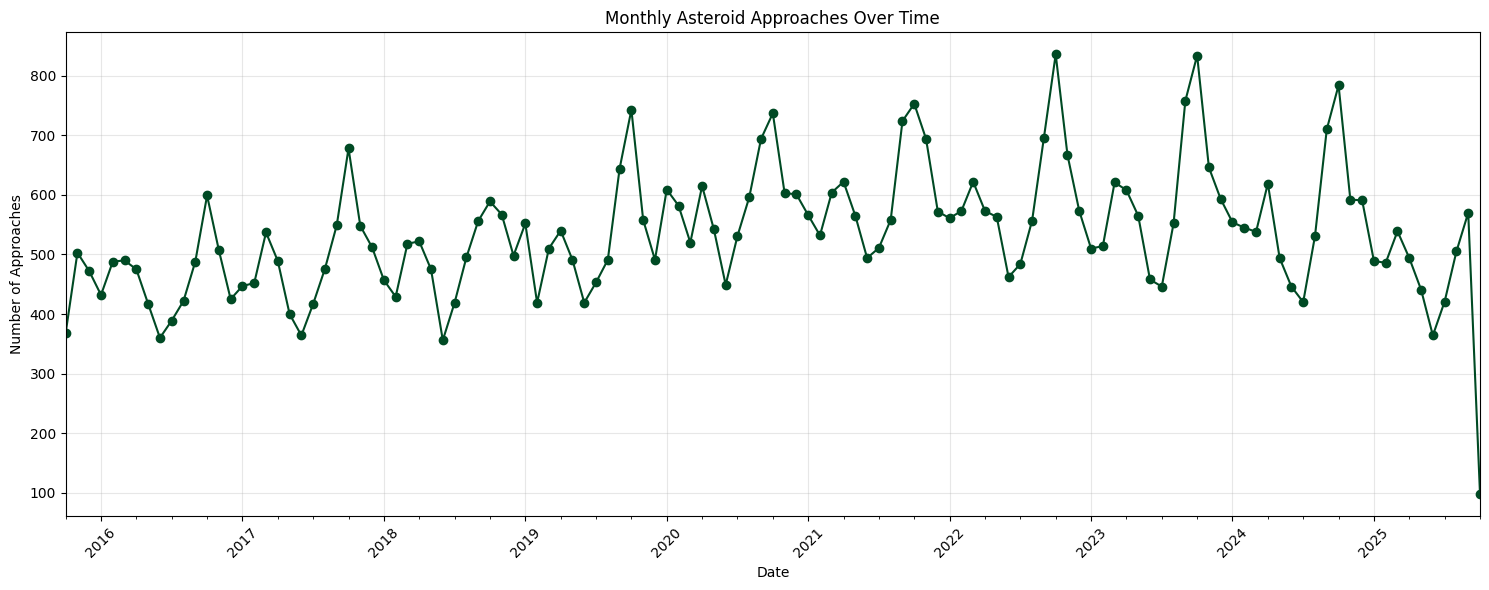

In [18]:
df['approach_date'] = pd.to_datetime(df['approach_date'])
monthly_approaches = df.groupby(df['approach_date'].dt.to_period('M')).size()

plt.figure(figsize=(15, 6))
monthly_approaches.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Approaches')
plt.title('Monthly Asteroid Approaches Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

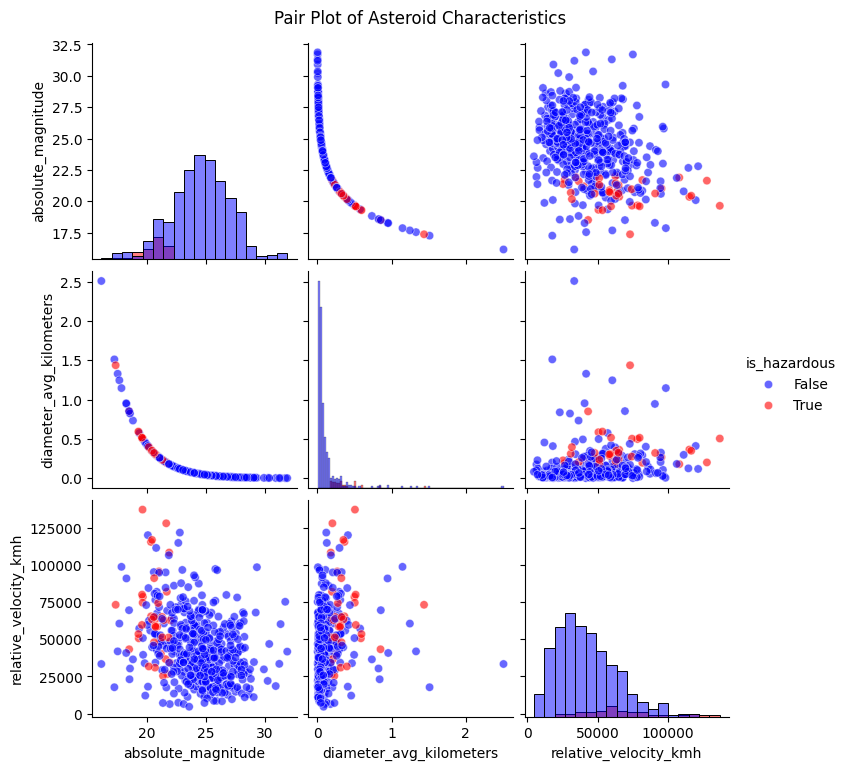

In [19]:
sample_df = df.sample(min(500, len(df)), random_state=42)
pairplot_vars = ['absolute_magnitude', 'diameter_avg_kilometers', 'relative_velocity_kmh', 'is_hazardous']
sns.pairplot(sample_df[pairplot_vars], hue='is_hazardous', diag_kind='hist', 
             palette={True: 'red', False: 'blue'}, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Asteroid Characteristics', y=1.02)
plt.show()



In [20]:
print("Dataset Overview:")
print(f"Total asteroids: {len(df)}")
print(f"Hazardous asteroids: {df['is_hazardous'].sum()} ({df['is_hazardous'].mean()*100:.1f}%)")
print(f"Date range: {df['approach_date'].min()} to {df['approach_date'].max()}")
print(f"\nDiameter statistics (km):")
print(f"  Min: {df['diameter_avg_kilometers'].min():.6f}")
print(f"  Max: {df['diameter_avg_kilometers'].max():.3f}")
print(f"  Mean: {df['diameter_avg_kilometers'].mean():.3f}")
print(f"  Median: {df['diameter_avg_kilometers'].median():.3f}")

Dataset Overview:
Total asteroids: 64673
Hazardous asteroids: 3675 (5.7%)
Date range: 2015-10-08 00:00:00 to 2025-10-05 00:00:00

Diameter statistics (km):
  Min: 0.001105
  Max: 35.937
  Mean: 0.120
  Median: 0.051
